<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/22%20-%20Sklearn%20Pre-processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22/30 Sklearn : Pre-processing

## 1. Encodage

### Encodage LabelEncoder (1 colonne catégorie en 1 colonne quantitative ) 
### et LabelBinarizer ( 1 colonne catégorie en 1 Matrice quantitative )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

In [2]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])  # 2 fois "chat " ici

encoder = LabelEncoder()  # encoder  = objet de la Classe LabelEncoder
encoder.fit(y)    # on entraine l'encoder par fit sur y qui donne un objet


LabelEncoder()

In [3]:
encoder.classes_   # voir l'objet crée après fit qui donne les classes d'objet sans les doublons ( ici 2 x chat éliminé )

array(['chat', 'chien', 'oiseau'], dtype='<U6')

In [4]:
encoder.transform(y) # on transforme y enfin ->array([0, 1, 0, 2])

array([0, 1, 0, 2])

In [5]:
encoder.fit_transform(y)  # astuce = focntion qui fait les 2  (fit + transforme)

array([0, 1, 0, 2], dtype=int64)

In [6]:
encoder.inverse_transform(np.array([0, 0, 2]))  # transformation inverse pour décoder les données après ML par exemple

array(['chat', 'chat', 'oiseau'], dtype='<U6')

In [7]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [8]:
encoder = LabelBinarizer(sparse_output=True)  # compresse la matrice 4x3 en format CSR compressed sparse row
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

### Encodage OrdinalEncoder ( x colonnes catégories en x colonnes quantitatives ) 
### et Encodage OneHotEncoder ( x colonnes catégories en matrice quantitative )


In [9]:
X = np.array([['chat', 'poils'],
              ['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

encoder = OrdinalEncoder()   
encoder.fit_transform(X) # -> array([[0., 1.], 
                                #   [1., 1.], 
                                #   [0., 1.], 
                                #  [2., 0.]]) et pb sens chat<chien<oiseau car 0<1<2

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [11]:
encoder = OneHotEncoder(sparse_output=False)  # sinon compression par défaut sparse_output=True
encoder.fit_transform(X)   # donne une matrice creuse ( bp de 0 ) = sparse matrix => super

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

## 2. Normalisation

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#### test sur un tableau de surfaces d'appartements
#### 1 - MinMaxScaler

In [13]:
X_train = np.array([[70],[80],[120]])  # 1 - on normalise sur notre train_set (ici surfaces d'appartements en m²)
scaler = MinMaxScaler()                # 2 - on définit notre scaler = mise à l'échelle = normalisateur
scaler.fit_transform(X_train)          # 3 - on entraine et transforme nos données par le scaler

array([[0. ],
       [0.2],
       [1. ]])

In [14]:
X_test = np.array([[90]]) # si une nouvelle surface apparait dans notre X_test
scaler.transform(X_test)  # 4 - on normalise aussi le X_test avec transform() -> array([[0.4]])

array([[0.4]])

In [15]:
Z = scaler.fit_transform(X_train)  
scaler.inverse_transform(Z)  # pour revenir à nos données de base non normalisées -> Utiliser la fonction inverse_transform()

array([[ 70.],
       [ 80.],
       [120.]])

#### 2 - StandardScaler

In [16]:
scaler = StandardScaler()                # 2 - on définit notre scaler = mise à l'échelle = normalisateur
scaler.fit_transform(X_train)          # 3 - on entraine et transforme nos données par le scaler

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

### 3 - RobustScaler

In [17]:
scaler = RobustScaler()               # 2 - on définit notre scaler = mise à l'échelle = normalisateur
scaler.fit_transform(X_train)          # 3 - on entraine et transforme nos données par le scaler

array([[-0.4],
       [ 0. ],
       [ 1.6]])

#### Normalisation sur dataset Iris

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

### MinMaxScaler

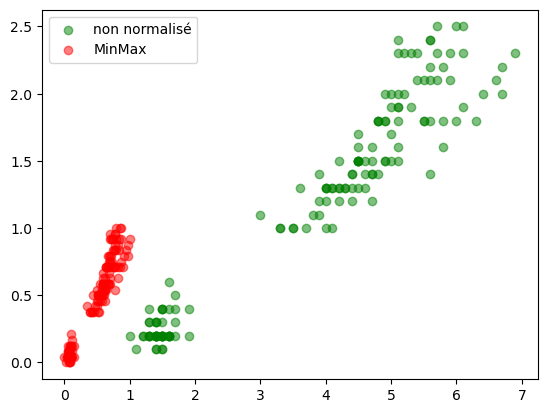

In [19]:
X_minmax = MinMaxScaler().fit_transform(X)  # nom du scler = X_minmax au lieu de scaler ci-dessus

plt.scatter(X[:, 2], X[:, 3], label='non normalisé', color='g', alpha=0.5)   # affiche le dataset de base ( non normalisé )
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label='MinMax', color='r', alpha=0.5)  # affiche le dataset normalisé
plt.legend()

### StandardScaler

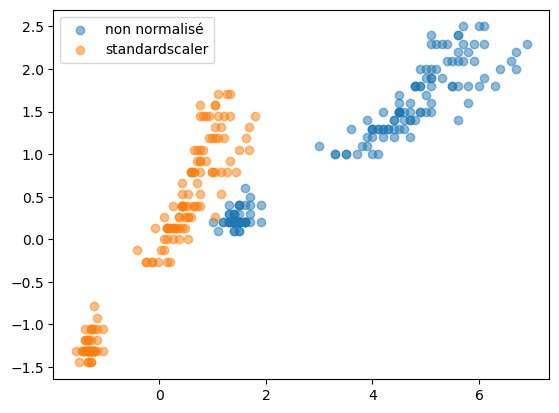

In [20]:
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], label='non normalisé', alpha=0.5)
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], label='standardscaler', alpha=0.5)
plt.legend()

### RobustScaler

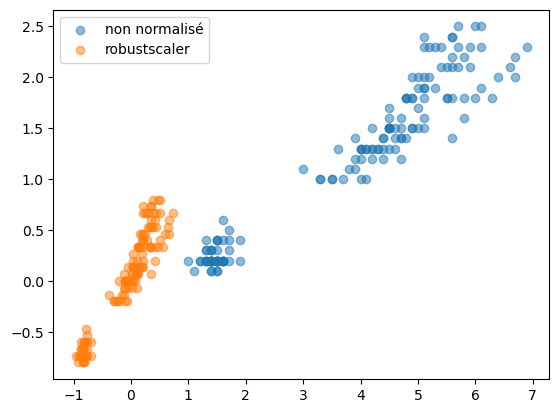

In [21]:
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], label='non normalisé', alpha=0.5)
plt.scatter(X_robust[:, 2], X_robust[:, 3], label='robustscaler', alpha=0.5)
plt.legend()

# 3. Polynomial Features

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

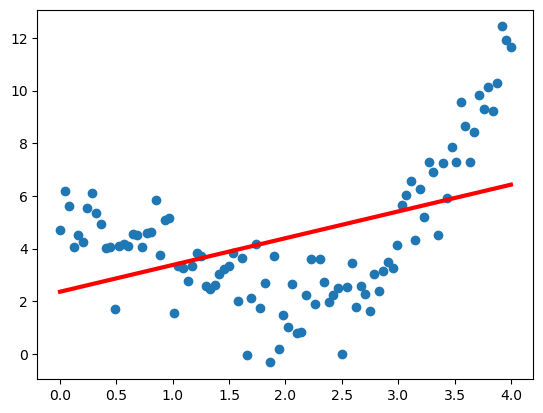

In [23]:
m = 100
X = np.linspace(0, 4, m).reshape((m, 1))  # X varie de 0 à 4, sur 100 points
y = X**2 + 5*np.cos(X) + np.random.randn(m, 1) # création de y, nuage de points selon x²+5cos(x) + random n= normale de dim (m,1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

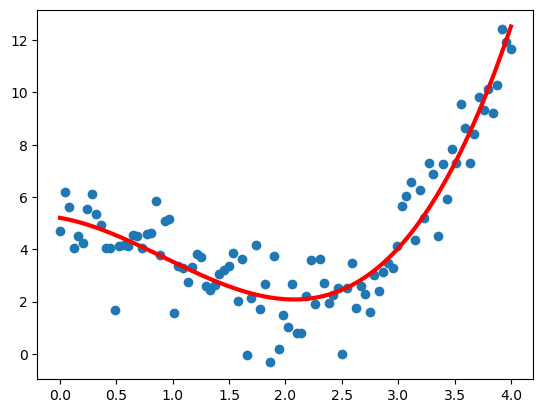

In [24]:
X_poly = PolynomialFeatures(3).fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

# 4. Discretisation = découper une variable continue en parties
## Binarizer -> découpage en 2 catégories ( 0 ou 1 ) selon un seuil définit

In [25]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [26]:
X = np.linspace(0, 5, 10).reshape((10, 1))  # X varie entre 0 et 5 ici pour 10 valeurs
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [27]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))  # threshold= seuil = 3, donc dessous->0 et dessus->1

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [28]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()  # découpage ici en 6 catégories de nos 10 valeurs ( les 1 ici )

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# 5. Pipelines

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier  # modele de classificateur linéaire par descente de gradient
from sklearn.model_selection import train_test_split

In [30]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)


0.9473684210526315

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))

model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [34]:
params = {
    'polynomialfeatures__degree':[2, 3, 4],   # on prend les classes sans les majuscules=parametres
    'sgdclassifier__penalty':['l1', 'l2']     # et trouver les params de ces classes à optimiser, ici degree et penalty
}


In [35]:
grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [36]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

In [37]:
grid.score(X_test, y_test)

0.9736842105263158